In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


data = pd.read_csv('C:/Users/priya/Desktop/Semester-6/Work/Thesis/Code/preprocessed_emotion_data.csv')


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64591 entries, 0 to 64590
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            64591 non-null  int64  
 1   Situation             64517 non-null  object 
 2   emotion               64591 non-null  object 
 3   empathetic_dialogues  64591 non-null  object 
 4   labels                64591 non-null  object 
 5   Unnamed: 5            68 non-null     object 
 6   Unnamed: 6            0 non-null      float64
 7   emotion_encoded       64591 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.9+ MB
None


In [5]:
print(data.head())

   Unnamed: 0                                          Situation      emotion  \
0           0  remember going firework best friend lot people...  sentimental   
1           1  remember going firework best friend lot people...  sentimental   
2           2  remember going firework best friend lot people...  sentimental   
3           3  remember going firework best friend lot people...  sentimental   
4           4  remember going firework best friend lot people...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels Unnamed: 5  Unnamed: 6  \
0  Was this a friend you were in love with, or ju...        NaN         NaN   
1                 

C:\Users\ashut\AppData\Local\Temp\ipykernel_16076\4036171140.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='emotion', y='count', data=dialogues_per_emotion, palette="Blues_d")  # Dark blue color palette


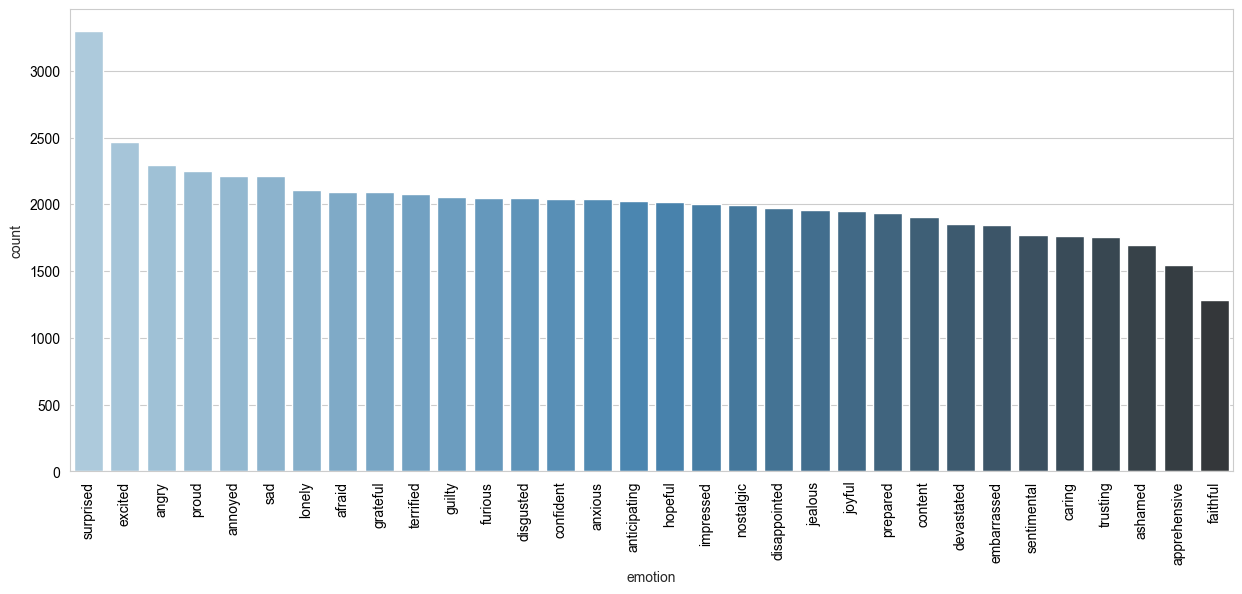

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of dialogues per emotion
dialogues_per_emotion = data['emotion'].value_counts().reset_index()
dialogues_per_emotion.columns = ['emotion', 'count']

# Set white background style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(15,6))
ax = sns.barplot(x='emotion', y='count', data=dialogues_per_emotion, palette="Blues_d")  # Dark blue color palette

# Customize plot aesthetics
plt.xticks(rotation=90, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Set white background
plt.gca().set_facecolor("white")  # Ensures background is white

# Show the plot
plt.show()


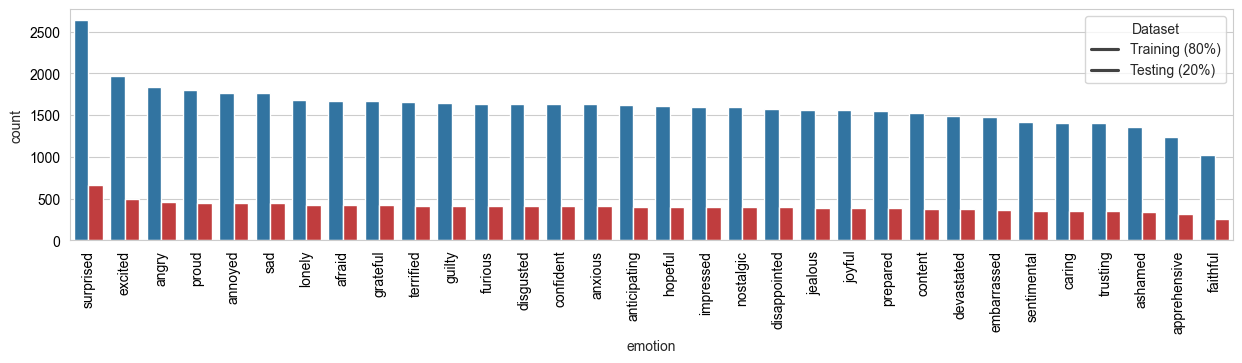

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataset containing an 'emotion' column
# Split the dataset into 80% training and 20% testing
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['emotion'], random_state=42)

# Count occurrences of each emotion in training and testing sets
train_counts = train_data['emotion'].value_counts().reset_index()
train_counts.columns = ['emotion', 'train_count']

test_counts = test_data['emotion'].value_counts().reset_index()
test_counts.columns = ['emotion', 'test_count']

# Merge both distributions on 'emotion'
emotion_counts = pd.merge(train_counts, test_counts, on='emotion', how='inner')

# Melt the data for seaborn (long format)
emotion_counts = emotion_counts.melt(id_vars='emotion', var_name='dataset', value_name='count')

# Set the style
sns.set_style("whitegrid")

# Define a manual color mapping for the two categories
color_mapping = {"train_count": "#1f77b4", "test_count": "#d62728"}  # Blue for training, Red for testing

# Create the grouped bar plot
plt.figure(figsize=(15, 3))
ax = sns.barplot(x='emotion', y='count', hue='dataset', data=emotion_counts, 
                 palette=[color_mapping[val] for val in emotion_counts["dataset"].unique()])

# Customize plot aesthetics
plt.xticks(rotation=90, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Set white background
ax.set_facecolor("white")

# Show legend with correct labels
plt.legend(title="Dataset", labels=["Training (80%)", "Testing (20%)"])

# Show the plot
plt.show()


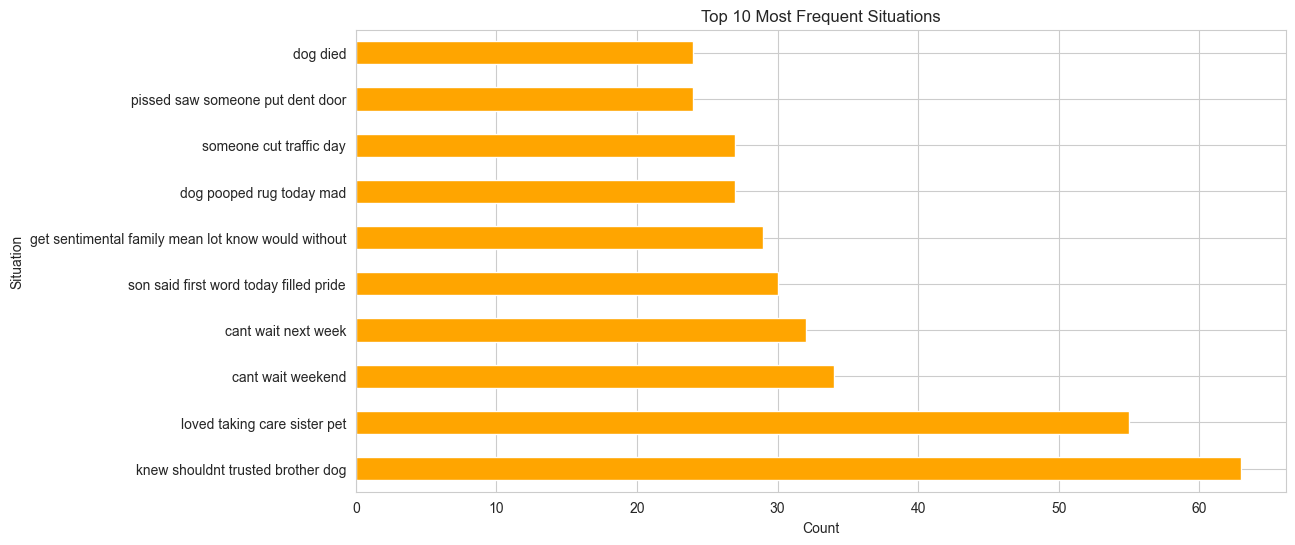

In [8]:
plt.figure(figsize=(12, 6))
data["Situation"].value_counts().head(10).plot(kind="barh", color="orange")
plt.title("Top 10 Most Frequent Situations")
plt.xlabel("Count")
plt.ylabel("Situation")
plt.show()


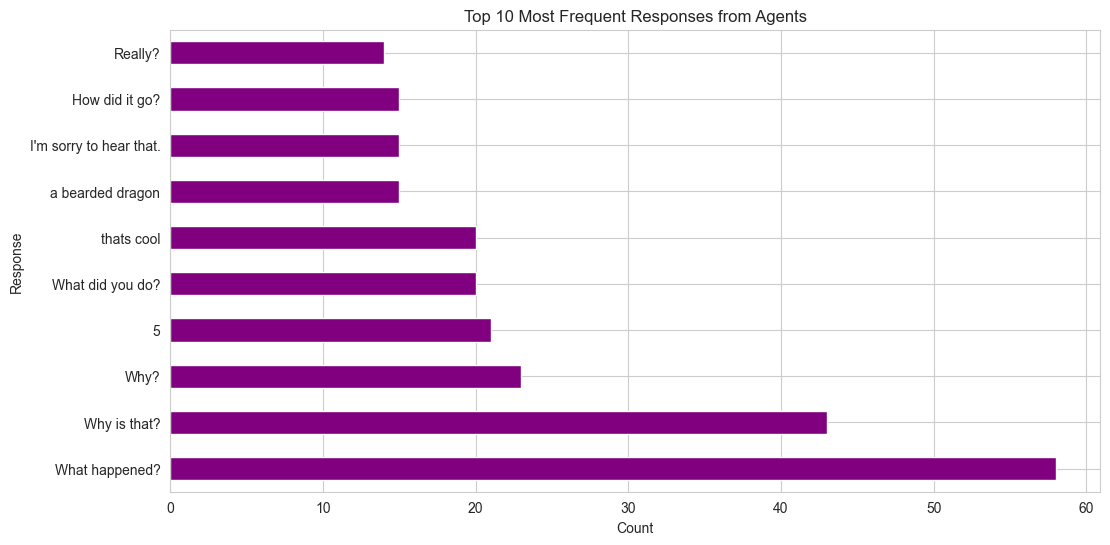

In [9]:
plt.figure(figsize=(12, 6))
data["labels"].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Most Frequent Responses from Agents")
plt.xlabel("Count")
plt.ylabel("Response")
plt.show()


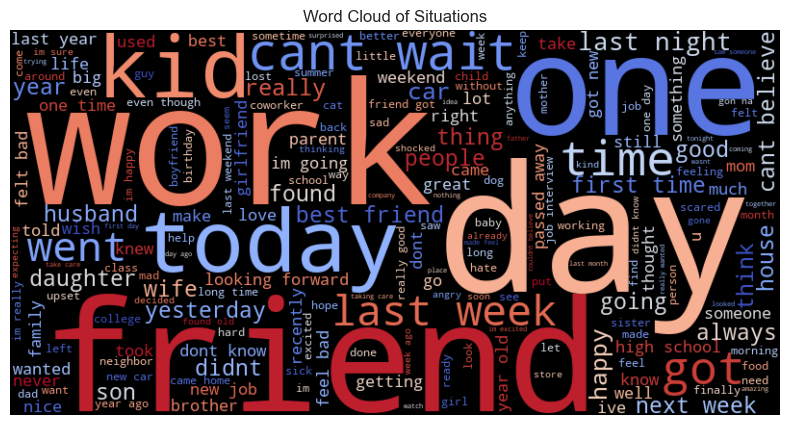

In [10]:
from wordcloud import WordCloud

situation_text = " ".join(data['Situation'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm').generate(situation_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Situations")
plt.show()
